In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
t = pd.read_csv("E:\\Kaggle Projects\\train.csv")
t

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## EDA

In [4]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
t.shape

(891, 12)

In [6]:
t.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
t.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
t1 = t.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [9]:
t1['Age'].replace(np.nan,np.mean(t1['Age']),inplace=True)
t1['Embarked'].replace(np.nan,0,inplace=True)

In [10]:
t1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [11]:
t2 = pd.get_dummies(t1,columns=['Sex','Embarked'])


In [12]:
t2

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_0,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,0,1,0,0


In [13]:
t2.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_0    0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [14]:
t2.drop(['Embarked_0'],axis=1,inplace=True)

In [15]:
t2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [17]:
X = t2.iloc[:,1:]
Y = t2.iloc[:,0]

[0.10395983 0.24729223 0.04364653 0.0438135  0.23306865 0.15508722
 0.14523495 0.01153173 0.00622766 0.0101377 ]


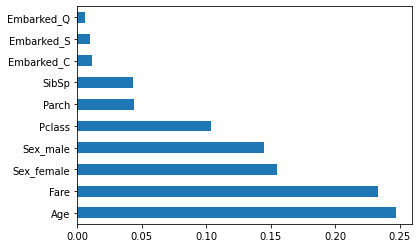

In [18]:
#import pandas as pd
#import numpy as np
#data = pd.read_csv("C://Users//Intel//Documents//mobile_price_train.csv")
#a = zoo.iloc[:,1:-1]  #independent variable columns
#b = zoo.iloc[:,-1]    #target variable column (price range)
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) 
 
#plot the graph of feature importances 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

### Importing test data

In [19]:
te = pd.read_csv("E:\\Kaggle Projects\\test.csv")
te.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
te.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [21]:
te1 = te.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [22]:
te1.iloc[:,2].replace(np.nan,np.mean(te1['Age']),inplace=True)
te1.iloc[:,5].replace(np.nan,0,inplace=True)

In [23]:
te2 = pd.get_dummies(te1,columns=['Sex','Embarked'])

In [24]:
te2

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.50000,0,0,7.8292,0,1,0,1,0
1,3,47.00000,1,0,7.0000,1,0,0,0,1
2,2,62.00000,0,0,9.6875,0,1,0,1,0
3,3,27.00000,0,0,8.6625,0,1,0,0,1
4,3,22.00000,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,0,1,0,0,1
414,1,39.00000,0,0,108.9000,1,0,1,0,0
415,3,38.50000,0,0,7.2500,0,1,0,0,1
416,3,30.27259,0,0,8.0500,0,1,0,0,1


In [25]:
te2.shape

(418, 10)

In [26]:
x_te = te2.values

In [27]:
t2.shape

(891, 11)

## Visualization 

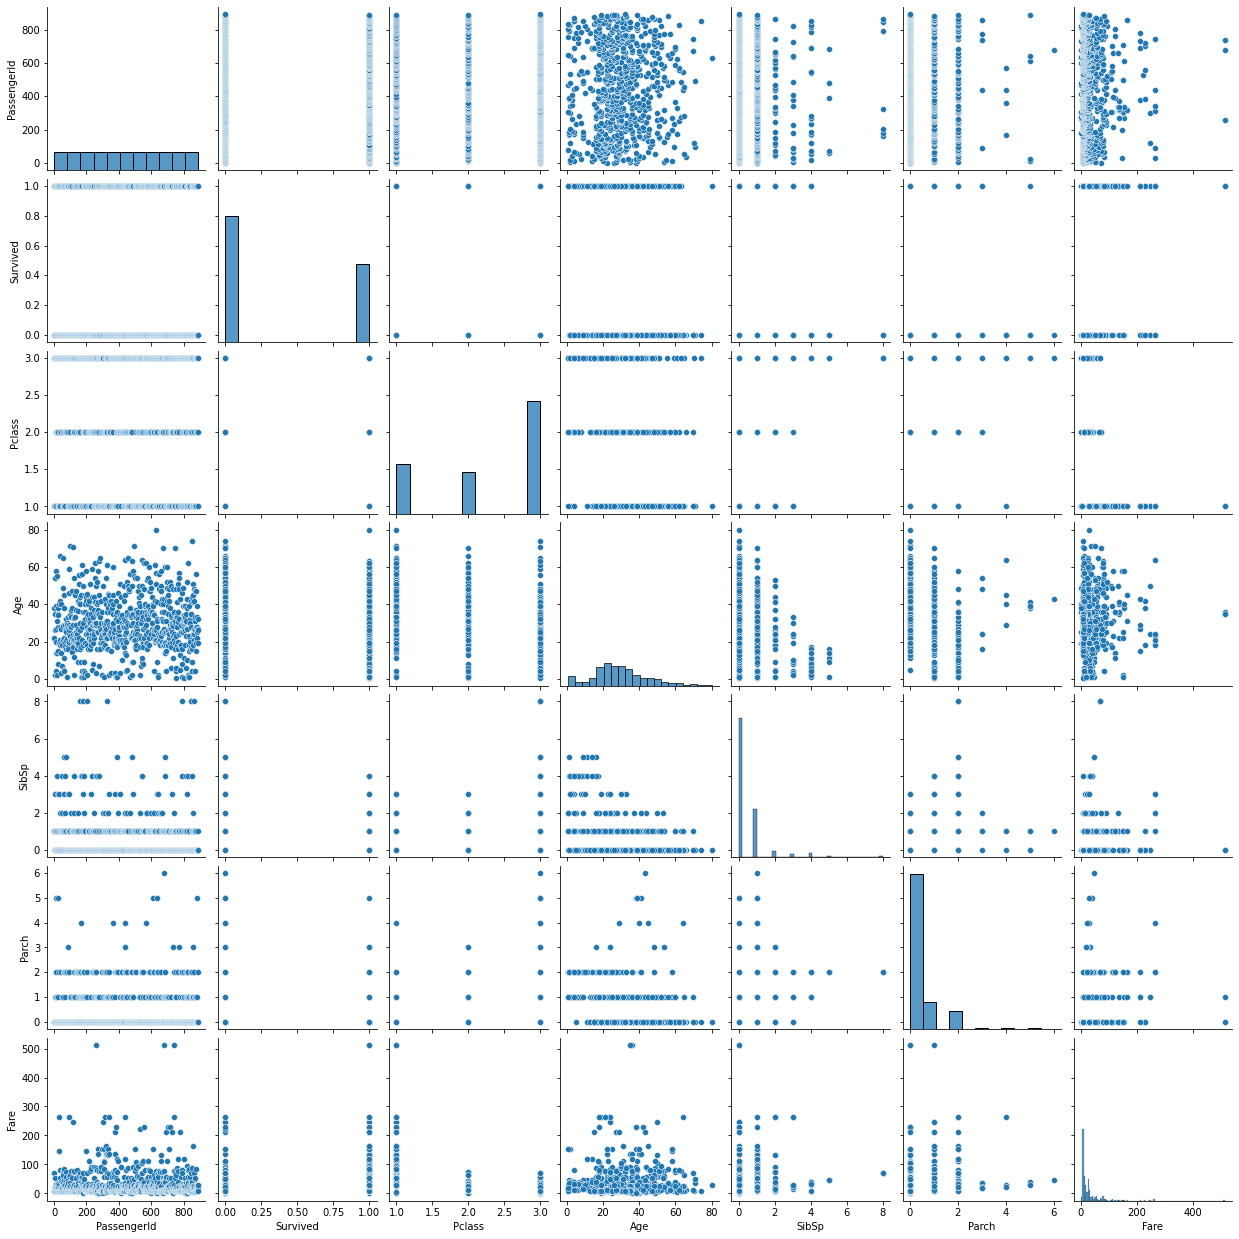

In [28]:
sns.pairplot(t)

<AxesSubplot:>

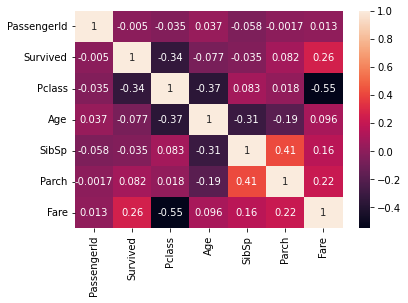

In [29]:
sns.heatmap(t.corr(),annot=True)

<AxesSubplot:xlabel='Sex_male', ylabel='Survived'>

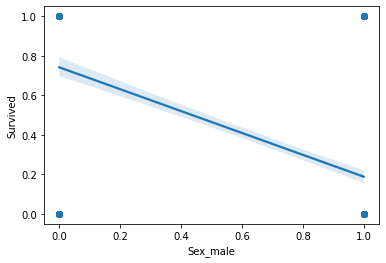

In [32]:
sns.regplot(t2['Sex_male'],t2['Survived'])

<AxesSubplot:xlabel='Sex_female', ylabel='Survived'>

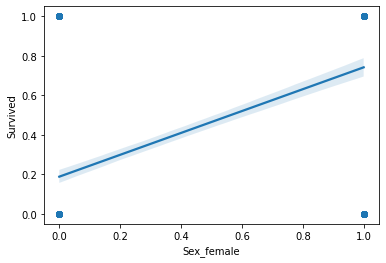

In [33]:
sns.regplot(t2['Sex_female'],t2['Survived'])

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

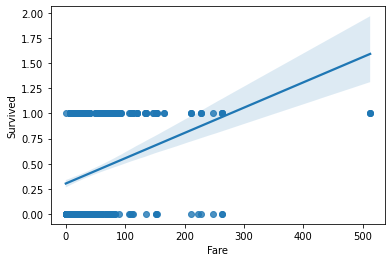

In [34]:
sns.regplot(t2['Fare'],t2['Survived'])

<AxesSubplot:xlabel='Age', ylabel='Survived'>

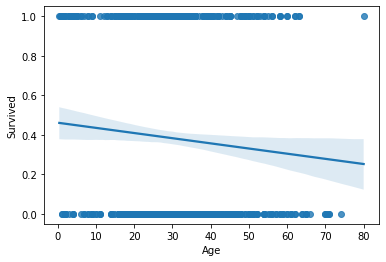

In [35]:
sns.regplot(t2['Age'],t2['Survived'])

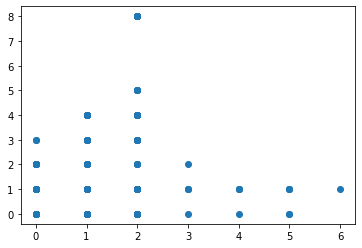

In [36]:
plt.scatter(t2['Parch'],t2['SibSp'])

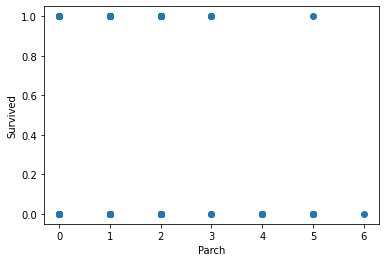

In [37]:
plt.xlabel('Parch')
plt.ylabel('Survived')
plt.scatter(t2['Parch'],t2['Survived'])
plt.show()

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

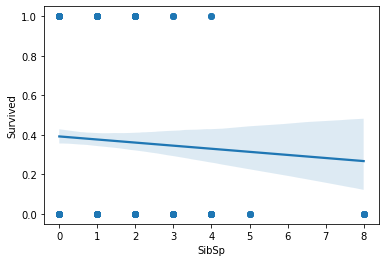

In [38]:
sns.regplot(t2['SibSp'],t2['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

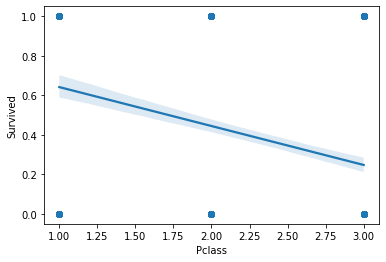

In [39]:
sns.regplot(t2['Pclass'],t2['Survived'])

<AxesSubplot:ylabel='Density'>

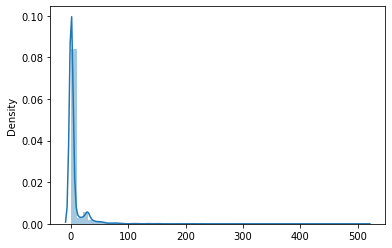

In [40]:
sns.distplot(t2)

## Normalization

In [41]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train = scaler.fit_transform(X)
X_train

array([[ 0.82737724, -0.5924806 ,  0.43279337, ..., -0.48204268,
        -0.30756234,  0.61930636],
       [-1.56610693,  0.63878901,  0.43279337, ...,  2.0745051 ,
        -0.30756234, -1.61470971],
       [ 0.82737724, -0.2846632 , -0.4745452 , ..., -0.48204268,
        -0.30756234,  0.61930636],
       ...,
       [ 0.82737724,  0.        ,  0.43279337, ..., -0.48204268,
        -0.30756234,  0.61930636],
       [-1.56610693, -0.2846632 , -0.4745452 , ...,  2.0745051 ,
        -0.30756234, -1.61470971],
       [ 0.82737724,  0.17706291, -0.4745452 , ..., -0.48204268,
         3.25137334, -1.61470971]])

In [42]:
t2.shape

(891, 11)

In [43]:
Y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [44]:
x_train = scaler.fit_transform(te2)

In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [46]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)

## SVC

In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[0.5,0.1,0.01,0.001,0.0001],
               'C':[1,10,50,100]}]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,Y)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 10, 50, 100],
                          'gamma': [0.5, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}])

In [48]:
gsv.best_params_, gsv.best_score_

({'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}, 0.8305243445692885)

In [49]:
results1 = cross_val_score(clf, X_train, Y, cv=kfold)
print("Accuracy is =", results1.mean())

Accuracy is = 0.823832709113608


## Neural Network

In [50]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(8, input_dim=10, activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [65]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X_train, Y, validation_split=0.3, epochs=150, batch_size=10)

Epoch 1/150
63/63 [==============================] - 1s 4ms/step - loss: 0.3818 - accuracy: 0.8411 - val_loss: 0.4084 - val_accuracy: 0.8246
Epoch 2/150
63/63 [==============================] - 0s 2ms/step - loss: 0.3804 - accuracy: 0.8459 - val_loss: 0.4104 - val_accuracy: 0.8321
Epoch 3/150
63/63 [==============================] - 0s 2ms/step - loss: 0.3796 - accuracy: 0.8427 - val_loss: 0.4048 - val_accuracy: 0.8246
Epoch 4/150
63/63 [==============================] - 0s 2ms/step - loss: 0.3796 - accuracy: 0.8411 - val_loss: 0.4094 - val_accuracy: 0.8284
Epoch 5/150
63/63 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.8475 - val_loss: 0.4090 - val_accuracy: 0.8246
Epoch 6/150
63/63 [==============================] - 0s 2ms/step - loss: 0.3802 - accuracy: 0.8379 - val_loss: 0.4112 - val_accuracy: 0.8284
Epoch 7/150
63/63 [==============================] - 0s 2ms/step - loss: 0.3788 - accuracy: 0.8411 - val_loss: 0.4079 - val_accuracy: 0.8246
Epoch 8/150
6

In [66]:
scores = model.evaluate(X_train, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

28/28 [==============================] - 0s 2ms/step - loss: 0.3829 - accuracy: 0.8395
accuracy: 83.95%


## KNN

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
results2 = cross_val_score(KNN, X_train, Y, cv=kfold)
print("Accuracy is =", results2.mean())

Accuracy is = 0.7957927590511861


## Naive_Bayes

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB


mnb = GaussianNB()
#mnb.fit(X_train, Y)
result3 = cross_val_score(mnb, X_train, Y, cv=kfold)
print("Accuracy(in %) : ", result3.mean()*100)

Accuracy(in %) :  78.78651685393258


## Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
results4 = cross_val_score(dtc, X_train, Y, cv=kfold)
print('Accuracy is(in %)', results4.mean()*100)

Accuracy is(in %) 78.22846441947566


## Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
results6 = cross_val_score(lr, X_train, Y, cv=kfold)
print('Accuracy is(in %)', results6.mean()*100)

Accuracy is(in %) 79.23845193508114


## RandomForest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
num_trees=100
rfc = RandomForestClassifier(n_estimators=num_trees, max_features = 10)
results5 = cross_val_score(rfc, X_train, Y, cv=kfold)
print('Accuracy is(in %)', results5.mean()*100)

Accuracy is(in %) 81.37078651685393


## Adaboost

In [58]:
from sklearn.ensemble import AdaBoostClassifier

num_trees=100
modelada = AdaBoostClassifier(n_estimators=num_trees)
results_boost = cross_val_score(modelada, X_train, Y, cv=kfold)
print(results_boost.mean()*100)

80.35955056179773


In [59]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

#Iteration1
seed=10
estimators1 = []
model7 = LogisticRegression(max_iter=500,random_state=seed)
estimators1.append(('logistic', model7))

model8 = RandomForestClassifier(random_state=seed)
estimators1.append(('cart', model8))

#model9 = KNeighborsClassifier()
#estimators1.append(('knn', model9))

#model9 = SVC()
#estimators1.append(('svm', model9))

#model10 = BaggingClassifier(base_estimator='cart', n_estimators=num_trees)
#estimators1.append(('bagging', model10))
#num_trees=100
model11 = AdaBoostClassifier(random_state=seed)
estimators1.append(('boosting', model11))


# create the ensemble modelIter
ensemble1 = VotingClassifier(estimators1)
#results1 = cross_val_score(ensemble1, X_train,Y, cv=kfold)
results1 = cross_val_score(ensemble1, X_train,Y, cv=kfold)
ensemble1.fit(X_train, Y)
print(results1.mean()*100)

81.81897627965043


In [62]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

#Iteration2
num_trees=100
estimators3 = []
model15 = LogisticRegression(max_iter=500,random_state=seed)
estimators3.append(('logistic', model15))

model16 = DecisionTreeClassifier(random_state=seed)
estimators3.append(('cart', model16))

model17 = SVC()
estimators3.append(('svm', model17))

model18 = BaggingClassifier(n_estimators=num_trees,random_state=seed)
estimators3.append(('bagging', model18))

model19 = AdaBoostClassifier(n_estimators=num_trees,random_state=seed)
estimators3.append(('boosting', model19))

# create the ensemble modelIter
ensemble3 = VotingClassifier(estimators3)
results3 = cross_val_score(ensemble3, X_train,Y, cv=kfold)
print(results3.mean()*100)


81.37203495630463


In [56]:
ensemble1.predict(x_te)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [64]:
from sklearn.model_selection import cross_val_score

#Iteration3
estimators2 = []
seed = 10
#model12 = AdaBoostClassifier()
#estimators2.append(('boosting', model12))
model12 = LogisticRegression(max_iter=500,random_state=seed)
estimators2.append(('logistic', model12))

model13 = RandomForestClassifier(random_state=seed)
estimators2.append(('cart', model13))

ensemble2 = VotingClassifier(estimators2)
ensemble2.fit(X_train, Y)
results2 = cross_val_score(ensemble2, X,Y, cv=5)
                
print(results2.mean())

0.8137028435126483


### Since we got better accuracy using Neural Network,84% accuracy we will use NN to predict the test data

In [85]:
y_pred = []
for i in model.predict(x_train):
    y_pred.append(np.where(i>0.5,1,0))
#for i in y_pred:
    #prediction = np.where(i >0.45, 1, 0)
predict = pd.DataFrame(y_pred)
te['Survived_prediction'] = predict
te

14/14 [==============================] - 0s 2ms/step


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_prediction
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [86]:
te['Survived_prediction'].value_counts()

0    289
1    129
Name: Survived_prediction, dtype: int64

## So ,I got the prediction as 289 people will not survive and 129 people will survive

In [82]:
te.to_csv("te.csv", index=False)

In [87]:
te.to_csv("E:\\Kaggle Projects\\test.csv",index=False)